In [68]:
from textblob import TextBlob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'

### TextBlob Example

In [20]:
word = 'Python is very good for Machine Learning'
tb = TextBlob(word)
tb_br = TextBlob('Python é uma merda para Machine Learning')
tb_br = tb_br.translate(to='en')

In [21]:
tb_br

TextBlob("Python sucks for Machine Learning")

In [22]:
tb.sentiment.polarity, tb_br.sentiment.polarity

(0.9099999999999999, -0.3)

### House Price ML

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/1576-mlops-machine-learning/aula-5/casas.csv')
df.columns = ['size', 'year', 'garage', 'price']
df.head()

,size,year,garage,price
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    1460 non-null   float64
 1   year    1460 non-null   int64  
 2   garage  1460 non-null   int64  
 3   price   1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


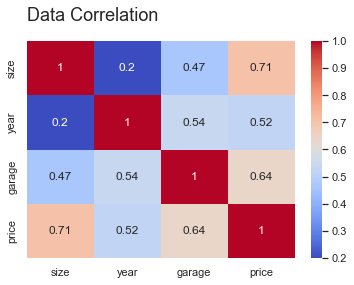

In [37]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Data Correlation', size=18, loc='left', pad=20);

### Create Model

In [28]:
# select target and features
X = df.drop(columns=['price'])
y = df['price']

In [64]:
# split data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

# fit to model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg_lin = LinearRegression().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def make_prediction(model, X, y, model_name = '', verbose = True):
    y_pred = model.predict(X)
    if verbose:
        print(f'{CYAN}{model_name} prediction:{WHITE}')
        print(f'R^2 score:{r2_score(y, y_pred):.2f}')
        print(f'MAE:{mean_absolute_error(y, y_pred):.2f}')
        print(f'RMSE:{np.sqrt(mean_squared_error(y, y_pred)):.2f}')
    return y_pred

In [65]:
for name, model in {'Linear Regression':reg_lin, 'Lasso (L1)':lasso, 'Ridge (L2)':ridge}.items():
    print(f'{GREEN}{name}{WHITE}')
    make_prediction(model, X_test, y_test, 'Test')
    make_prediction(model, X_train, y_train, 'Train')

Linear Regression
Test prediction:
R^2 score:0.70
MAE:31215.95
RMSE:47725.28
Train prediction:
R^2 score:0.68
MAE:29273.62
RMSE:43851.91
Lasso (L1)
Test prediction:
R^2 score:0.70
MAE:31215.89
RMSE:47725.30
Train prediction:
R^2 score:0.68
MAE:29273.39
RMSE:43851.91
Ridge (L2)
Test prediction:
R^2 score:0.70
MAE:31214.77
RMSE:47725.75
Train prediction:
R^2 score:0.68
MAE:29268.88
RMSE:43851.92


In [66]:
reg_lin.predict([[120,2001,1]])

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([166840.39081617])

### Save Model

In [69]:
pickle.dump(reg_lin, open('reg_lin_model','wb'))

with open('reg_lin_model', 'wb') as file:
    pickle.dump(reg_lin, file)

### Requests Library

In [1]:
import requests

In [16]:
username = 'baiochi'
password = 'batata'

payload = {
    'size' : 120,
    'year' : 2001,
    'garage' : 1
}

auth = requests.auth.HTTPBasicAuth(username, password)

end_point = 'http://127.0.0.1:5000/price_predict/'

response = requests.post(url = end_point, json = payload, auth = auth)
print(f'Status code: {response.status_code}')

Status code: 200


In [17]:
response.json()

{'price': 166840.3908161705}